In [ ]:
import pandas as pd

resultados_exames = pd.read_csv("exames.csv")
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


REMOVENDO A FEATURE DO EXAME 33 MUITOS DADOS NULOS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns="exame_33")

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, 
                                                        diagnostico,
                                                        test_size = 0.3)



classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print("Resultado da classificação %.2f%%" %(classificador.score(teste_x,teste_y)*100))


Resultado da classificação 92.40%


Padronizacao dos dados

In [ ]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns=valores_exames_v1.keys())
valores_exames_v2

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,1.421085e-14,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.110223e-16,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.421085e-14,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,1.110223e-16,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,1.421085e-14,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,1.110223e-16,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.421085e-14,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,1.110223e-16,2.289985,1.919083,2.219635


REMOVEMOS 2 features devido ao gráfico de violino e 2 features que nao traziam ganhos

In [ ]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_29", "exame_4"])

def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, 
                                                        diagnostico,
                                                        test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    print("Resultado da classificação %.2f%%" %(classificador.score(teste_x,teste_y)*100))

classificar(valores_exames_v3)

Resultado da classificação 92.98%


Avaliando a matrix de correlação dos dados

In [ ]:
valores_exames_v3.corr() 

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297




* A biblioteca Seaborn nos disponibiliza a função heapmap() que nos possibiliza criar esse tipo de visualização.


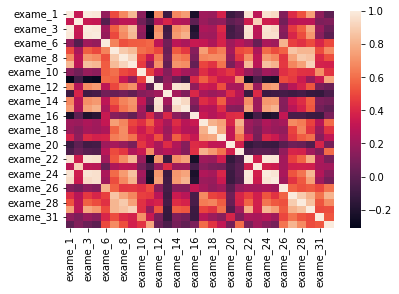

In [ ]:
import seaborn as sns
matriz_correlacao = valores_exames_v3.corr()
sns.heatmap(matriz_correlacao)


* **Aumentando** o tamanho da matriz com plt.figure(figsize = (17, 15)
* **annot = True** anotará em cada quadrado da célula o valor da correlação. 
* **fmt = ".1f",** mostrará apenas uma casa decimal 

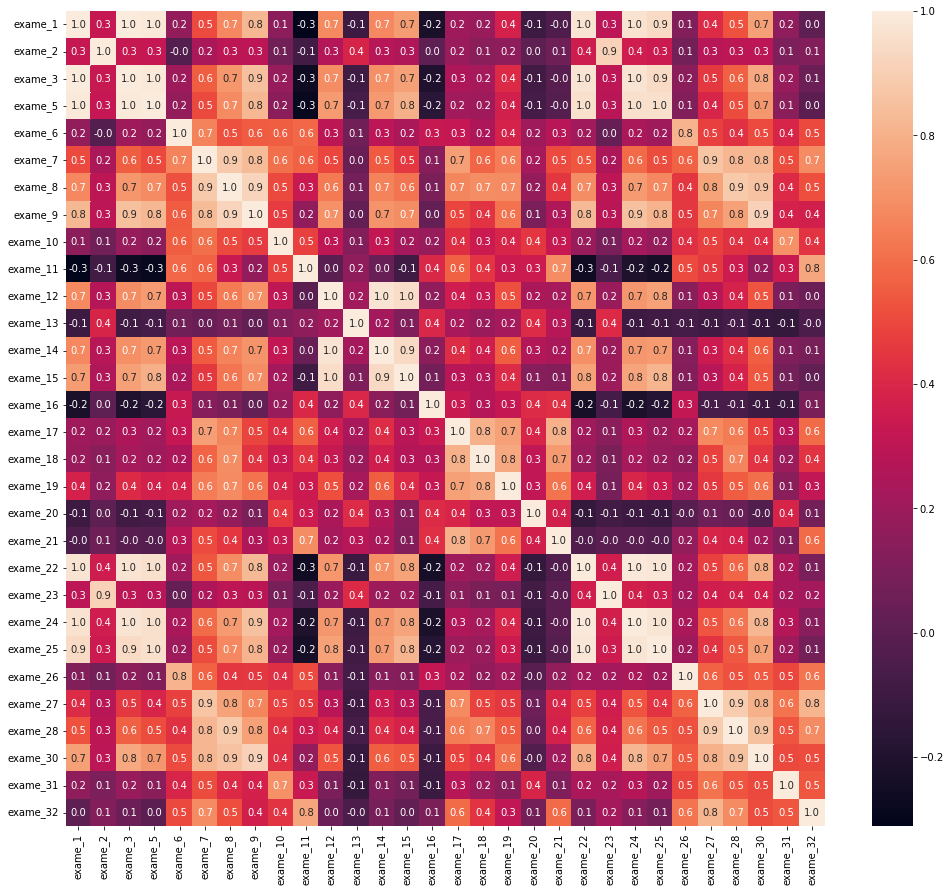

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

É possível encontrar diversas features totalmente correlacionadas, com valores iguais a 1.0, e outras com um valor bem próximo, como 0.9

Trabalharemos na remoção das features altamente correlacionadas.
Criaremos então uma matriz_correlacao_v1 que armazenará o retorno de todos as correlações superiores a 0.99. ou seja, que possuem uma correlação quase perfeita.

In [ ]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Com a matriz contendo somente os valores maiores que 0.99, enquanto todos os outros são ficam em NaN. Da mesma forma que quando excluímos os valores vazios do conjunto de dados, podemos fazer uma soma desses valores e criar uma nova variável variaveis_correlacionadas que armazenará os retornos maiores do que 1.0.

In [ ]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

Feito isso, criaremos um valores_exames_v4 sem das colunasas listadas em variaveis_correlacionadas.

In [ ]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v4


,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,...,-1.138416,0.167980,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,...,-0.189161,-0.490556,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,...,-0.891416,0.036727,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,...,0.326634,0.904057,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [ ]:
classificar(valores_exames_v4)

Resultado da classificação 91.81%


Obtivemos um resultado um pouco pior do que aquele que vínhamos obtendo, mas por que? Nós descobrimos as variáveis que estavam correlacionadas e excluímos todas essas features, mas era isso que queríamos? 

Vamos voltar e ver na matriz
"exame_1" e "exame_3" estão totalmente correlacionadas, 
da mesma forma que "exame_22" e "exame_24"

Então temos que apenas excluir uma de cada

In [ ]:
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])
classificar(valores_exames_v5)

Resultado da classificação 92.98%


Agora sim resultado melhorou

# Existe uma maneira de selecionarmos um determinado número ("k") de melhores features desse conjunto? Gerar uma pontuação para cada feature (cada exame) e selecionar as melhores dentre elas.

Essa pontuação será realizada pela função Qui-quadrado - quais features serão mais representativas para nosso processo de classificação. 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k = 5)

In [ ]:
# treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, diagnostico, test_size = 0.3)
# selecionar_kmelhores.fit(treino_x,treino_y)

# Erro in chi2(X, y)
função qui-quadrado não aceita valores negativos, e existem vários deles, por exemplo, na coluna "exame_5". Uma alternativa para corrigirmos isso seria voltarmos para os valores não-normalizados que tínhamos no conjunto valores_exames_v1. 
Também eliminar tudo que já reconhecemos até aqui da nossa base...

In [ ]:
valores_exames_v6 = valores_exames_v1.drop(columns=(["exame_4", "exame_29", "exame_3", "exame_24"]))

SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size = 0.3)


selecionar_kmelhores.fit(treino_x,treino_y)

treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

# Com a função de transformação teremos um dataset com apenas 5 features nas bases de treino e teste

In [ ]:
treino_kbest.shape

(398, 5)

# Agora vamos treinar novamente para verificar o que temos de resultados com apenas 5 features

In [ ]:
classificador = RandomForestClassifier(n_estimators = 100, random_state=1234)
classificador.fit(treino_kbest, treino_y)

print("Resultado da classificação %.2f%%" % (classificador.score(teste_kbest, teste_y)* 100))


Resultado da classificação 92.40%


# Como foi? Qual conclusão?
Com apenas 5 exames dos 33 exames - cerca de 15% das features tivemos quase o mesmo resultado
Antes desse tratamento foi de 92.98% e agora 92.40%

In [ ]:
5/33

0.15151515151515152

Isso parece um sucesso, não? 
Mas será que analisar somente a acurácia é o suficiente, ou seria mais interessante analisar onde estamos errando entre Maligno e Benigno.
Removemos um volume muito grande de exames, e não sabemos qual o impacto disso. Será que estamos acertando mais quando o câncer é do tipo benigno? Ou errando mais quando ele é do tipo maligno?
# Vamos fazer isso com a Confusion Matriz



In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

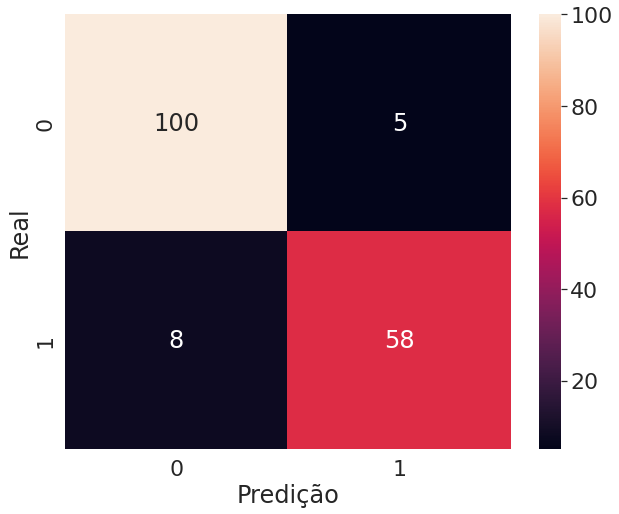

In [ ]:
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

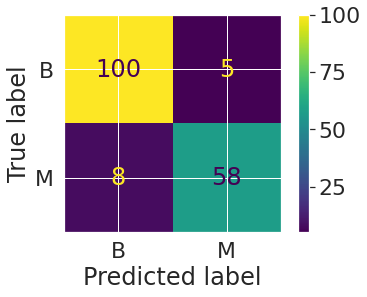

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(matriz_confusao, display_labels=['B','M'])
cmd.plot()

De 105 casos benignos, nosso modelo acertou 100, classificando o restante (5) como maligno. Já nos casos de cânceres malignos, nosso modelo acertou 58, classificando 8 como benignos.
 
Em alguns casos, como na área da saúde, é muito importante sabermos qual classificação estamos acertando mais. Imagine, por exemplo, uma pessoa que realmente tem câncer, mas recebe o diagnóstico de que não tem. Esse tipo de equívoco no diagnóstico tornaria o tratamento mais difícil, afinal o tempo de realização impacta nas chances de cura desse tipo de doença.

# RFE - Recursive Feature Elimination

Seleciona as features mais importante descartando as de menor acurácia. Esse processo será feito sucessivamente até atingir o número de features escolhidas. 

Resultado da classificação 90.06%


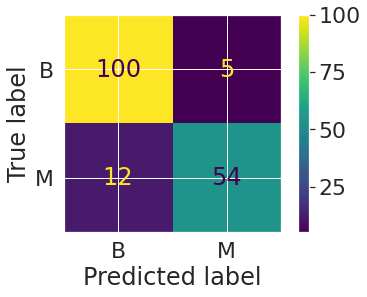

In [ ]:
from sklearn.feature_selection import RFE

SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 50)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfe))
cmd = ConfusionMatrixDisplay(matriz_confusao, display_labels=['B','M'])
cmd.plot()

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe,teste_y)*100))

# RFE foi um pouco pior que o outro métodos de seleção automática (SelectKBest) que chegavam a 92.40%.  

# Na confusion matrix, o RFE erra mais em relação ao diagnóstico de cânceres malignos.


# RFE Cross Validation - RFECV
Técnica que nos informa qual conjunto de features gerará o melhor resultado
Não precisaremos passar passar um número de features

Resultado da classificação 92.98%


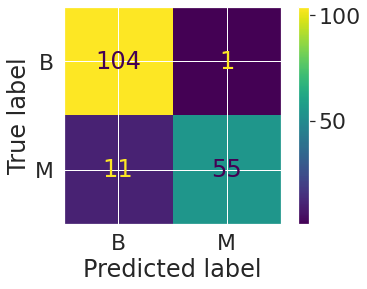

In [ ]:
from sklearn.feature_selection import RFECV

SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring="accuracy")
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfecv))
cmd = ConfusionMatrixDisplay(matriz_confusao, display_labels=['B','M'])
cmd.plot()

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfecv,teste_y)*100))

# CV em 5... logo levará mais tempo de processamento, pois gerará um RFE para cada um dos blocos

Número de features

In [ ]:
selecionador_rfecv.n_features_

20

Features selecionadas

In [ ]:
selecionador_rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Para listar diretamente as features selecionadas


In [ ]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_12', 'exame_14', 'exame_15', 'exame_20', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

score acumulativo para cada uma das features

In [ ]:
len(selecionador_rfecv.grid_scores_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


28

In [ ]:
selecionador_rfecv.grid_scores_[:,0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([0.775, 0.9  , 0.925, 0.95 , 0.95 , 0.95 , 0.925, 0.95 , 0.9  ,
       0.95 , 0.95 , 0.95 , 0.925, 0.925, 0.925, 0.975, 0.95 , 0.925,
       0.925, 0.925, 0.925, 0.925, 0.95 , 0.925, 0.925, 0.975, 0.9  ,
       0.95 ])

PQ o RFECV escolheu esse número de features? É possível plotarmos um gráfico que nos ajudará a entender essa escolha.
 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


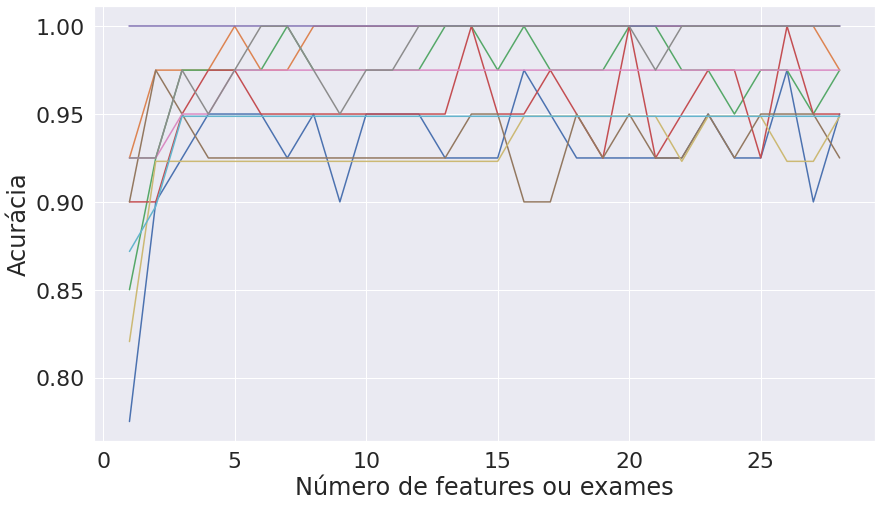

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 8))
plt.xlabel("Número de features ou exames")
plt.ylabel("Acurácia")
plt.plot(range(1, len(selecionador_rfecv.grid_scores_) +1), selecionador_rfecv.grid_scores_)
# one series for each fold in the cross validation
#plt.plot(range(1, len(selecionador_rfecv.grid_scores_) +1), selecionador_rfecv.grid_scores_[:,0])
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


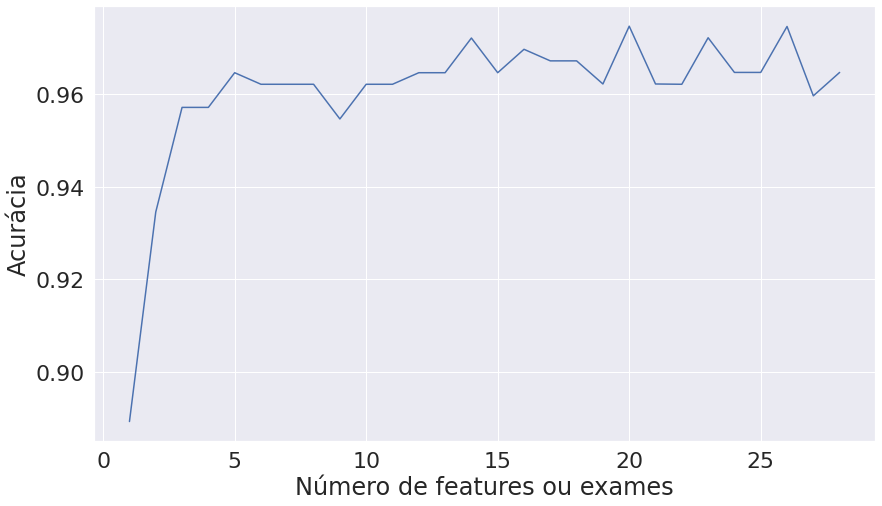

In [ ]:
import numpy

# axis=1 will find the average for the rows
rows_average = numpy.mean(selecionador_rfecv.grid_scores_, axis=1)
# média dos scores de cada fold do CV

plt.figure(figsize = (14, 8))
plt.xlabel("Número de features ou exames")
plt.ylabel("Acurácia")
plt.plot(range(1, len(selecionador_rfecv.grid_scores_) +1), rows_average)
plt.show()


Todos os métodos que utilizamos até o momento (SelectKBest, RFE e RFECV) selecionaram, como um filtro, algumas features, e por isso são chamados de "métodos de seleção de features" (feature selection methods). 

Agora vamos avaliar a dispersão dos resultados dos exames.

In [ ]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)

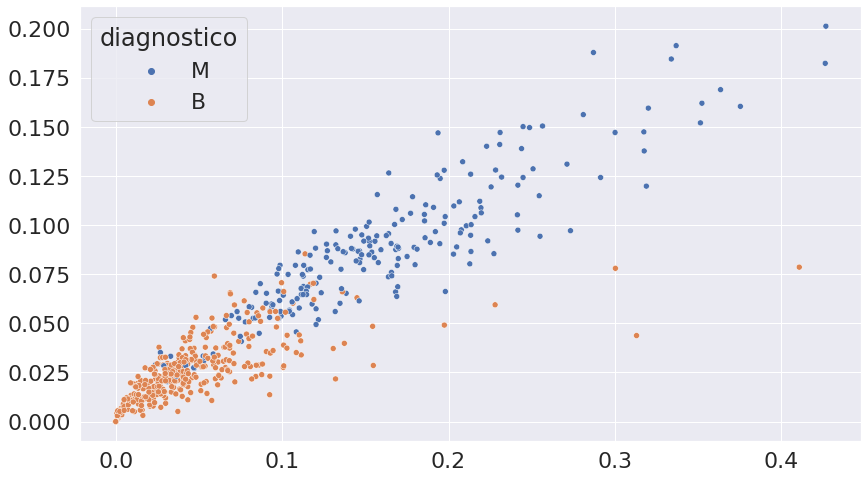

In [ ]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v7[:,0] , y = valores_exames_v7[:,1], hue = diagnostico)

O que fizemos aqui estamos visualizando dentro desta dispersão? selecionar apenas duas features não é o ideal certo?

# Principal Component Analysis - PCA 
Uma das técnicas que podemos utilizar para manter o máximo de informações possível em dimensionalidades reduzidas. 

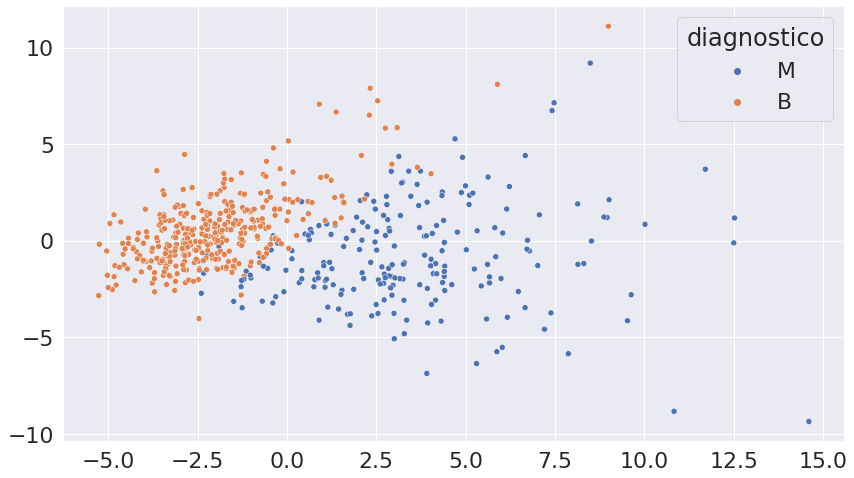

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v8[:,0] , y = valores_exames_v8[:,1], hue = diagnostico)

Podemos enxergar de maneira mais clara onde existem pontos com maiores confusões, traçando uma linha que dividirá os cânceres dos tipos maligno ou benigno. 
Existe uma técnica que se comporta melhor quando queremos gerar visualizações, chamada t-SNE, que também está presente no SKlearn. 
# t-SNE tenta manter as distâncias entre os pontos.

In [ ]:
print(valores_exames_v8.shape)
classificar(valores_exames_v8)

(569, 2)
Resultado da classificação 90.64%


In [ ]:
pca = PCA(n_components = 5)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)
print(valores_exames_v8.shape)
classificar(valores_exames_v8)

(569, 5)
Resultado da classificação 91.23%


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


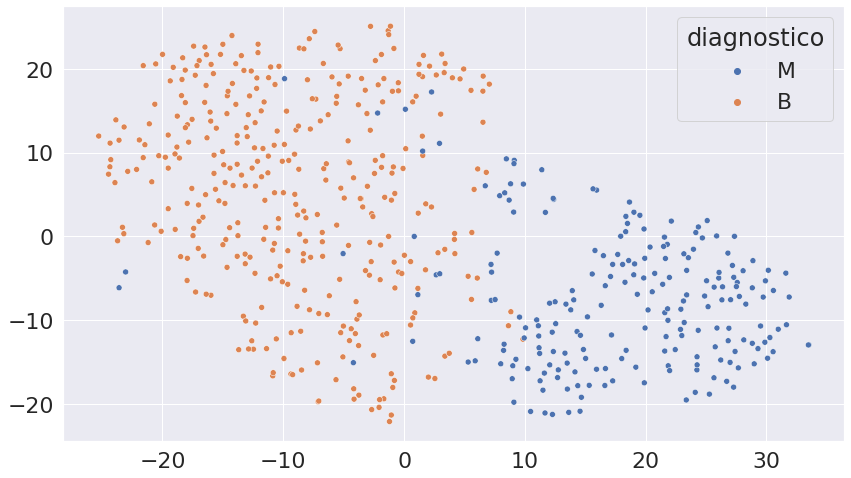

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v9[:,0] , y = valores_exames_v9[:,1], hue = diagnostico)



A visualização que separa muito bem os dados no espaço, tornando mais claro quais pontos estão próximos de um tipo de câncer maligno ou benigno. Assim, é bem mais simples determinar uma fronteira entre tais classificações.
Vamos ver como o indutor separa esta série também?

In [ ]:
print(valores_exames_v9.shape)
classificar(valores_exames_v9)

(569, 2)
Resultado da classificação 94.15%
